# 함수형 모델 
* 1 : 1 

## 0 사용할 패키지 불러오기 

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import random

from sklearn.model_selection import train_test_split  # 데이터 분리를 위해 사용 

## 1. 데이터셋 생성하기
* 학습 데이터 
* __검증 데이터__
* 테스트 데이터
* 사이킷 런에 잘 구현된 __train_test_split 함수__ 를 이용해서 데이터를 효율적으로 잘라냄 
    - test_size=0.4 : 테스트 사이즈가 40%라는 의미 (train : 60%, test : 40%)
    - suffle : 데이터를 섞을 것인지 선택 - 일반적으로 shuffule을 사용하면 결과가 더 좋음 
* train : val : test - 6:2:2 로 설정  

In [4]:
x = np.array(range(1, 101))
y = np.array(range(1, 101))

# 학습 데이터와 테스트 데이터 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.4, shuffle=False)

# 검증 데이터와 테스트 데이터 분리하기 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=66, test_size=0.5)

## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [5]:
# model = Sequential()
# model.add(Dense(5, input_shape = (1, ), activation ='relu'))
input1 = Input(shape=(1,))
dense1 = Dense(5, activation='relu')(input1)
dense2 = Dense(3)(dense1)
dense3 = Dense(4)(dense2)
output1 = Dense(1)(dense3)

# 전체 레이어를 묶어줌.
model = Model(inputs=input1, outputs=output1)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [6]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [7]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_val, y_val))

Train on 60 samples, validate on 20 samples
Epoch 1/100
60/60 [==============================] - 1s 17ms/sample - loss: 1296.7235 - mse: 1296.7233 - val_loss: 5585.5464 - val_mse: 5585.5464
Epoch 2/100
60/60 [==============================] - 0s 2ms/sample - loss: 802.9803 - mse: 802.9803 - val_loss: 3011.7681 - val_mse: 3011.7681
Epoch 3/100
60/60 [==============================] - 0s 2ms/sample - loss: 344.9458 - mse: 344.9457 - val_loss: 983.8142 - val_mse: 983.8143
Epoch 4/100
60/60 [==============================] - 0s 2ms/sample - loss: 68.9576 - mse: 68.9576 - val_loss: 95.3708 - val_mse: 95.3708
Epoch 5/100
60/60 [==============================] - 0s 2ms/sample - loss: 3.6719 - mse: 3.6719 - val_loss: 5.4201 - val_mse: 5.4201
Epoch 6/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.5627 - mse: 0.5627 - val_loss: 2.2737 - val_mse: 2.2737
Epoch 7/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.5420 - mse: 0.5420 - val_loss: 2.1949 - val_ms

60/60 [==============================] - 0s 2ms/sample - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 62/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 63/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 64/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 65/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 66/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 67/100
60/60 [==============================] - 0s 2ms/sample - loss: 8.9456e-04 - mse: 8.9456e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 68/100
60/60 [==============================] - 0s 2ms/sample

## 5. 학습과정 살펴보기

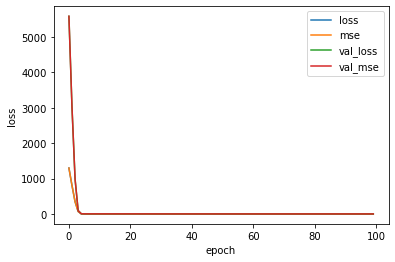

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [9]:
loss, mse = model.evaluate(x_test, y_test, batch_size =3)
print("loss : ", loss)
print("mse : ", mse )

20/20 [==============================] - 0s 3ms/sample - loss: 1.2165e-09 - mse: 1.2165e-09
loss :  1.2165400964381235e-09
mse :  1.2165401e-09


## 7. 예측하기 

In [10]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

결과물 : 
 [[64.999985]
 [79.99997 ]
 [90.99996 ]
 [65.99997 ]
 [61.999985]
 [95.99996 ]
 [63.999985]
 [88.99996 ]
 [91.99996 ]
 [99.99995 ]
 [92.99996 ]
 [85.99996 ]
 [84.99996 ]
 [77.99998 ]
 [69.99997 ]
 [74.99997 ]
 [68.999985]
 [72.99997 ]
 [83.99996 ]
 [96.99996 ]]


#### RMSE 구하기
* __평균 제곱근 오차 - RMSE(Root Mean Squared Error)__ 
    - 회귀 분석을 평가할 때 가장 많이 사용하는 지표 중에 하나
    - MSE에 루트를 사용
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것
    - RMSE는 낮을수록 정밀도가 높음

In [11]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  3.3211973357664364e-05


#### R2 구하기
* __결정 계수(R2)__
    - 회귀 분석에서 많이 사용하는 지표 중에 하나
    - RMSE와 반대로 높을수록 좋은 지표
    - 0~1사이의 수치 - 0.73 정도의 값이 나오면 73%의 설명력을 가진다고 해석 
    - 사이킷런에서 r2_score 함수로 제공 
    - 만약 R2의 값이 음수가 나오면 학습 시 머신에 뭔가 잘못된 부분이 존재한다는 의미 

In [12]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.999999999992193


#### 새로운 데이터로 예측 수행하기 
* x_predict에 새로운 값을 설정한 후 y_predict 값을 출력한다. 

In [13]:
x_predict = np.array(range(101, 111))
y_predict = model.predict(x_predict)
print(y_predict)

[[100.999954]
 [101.999954]
 [102.99995 ]
 [103.99996 ]
 [104.99995 ]
 [105.99995 ]
 [106.99995 ]
 [107.99995 ]
 [108.999954]
 [109.99994 ]]
